CQF Workshop
=======================
<br>

<center>Workshop by Dr Richard Diamond </center>

<center> April 2020 </center>
<br>

Agenda
---------

**1. Data Sources (US and International Equities, ETFs, Commodity Futures)**

Remember that in addition to large-cap equities (eg, AMZN, GOOG) there are interesting industries (eg, Healthcare, Biotech) and other asset classes. You are more likely to find a sensible prediction scheme for commodity futures rather than a popular large cap.

**2. Fixing Yahoo!Finance access**

How to work with pandas_datareader and its versions.

Packages installation in Python.

**3. Fama-French Factors data retrieval and essential interpretation**

How to work with pandas_datareader and its versions.

Packages installation in Python.


**4. Quick regression on market returns vs. factors**

_sklearn_ regression coeffients are found by optimisation.
 
_statsmodels.api_ provides the regression output and computes using the extact analytical formulae


**5. Statistical Plotting with Pandas: 3D Scatter, Lag Plots, Autocorrelation, Bootstrap Plot**
<br><br>

-----------


In [1]:
%pylab inline
%matplotlib inline

import warnings
import numpy as np
import pandas as pd

import datetime as dt

Populating the interactive namespace from numpy and matplotlib


---

# Part 1. Data Sources: Equities, Indicies, ETFs, Commodity Futures
<br><br>

* **Yahoo!Finance** more below.

_pandas-datareader_ [recent available sources v0.6.0](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html):

* **Google Finance** but it is unclear whether pandas_datareader v0.6.0 or v0.5.0 preferrable.
<br><br>

*  **Tiingo** alternative introduced. Tiingo provides historical end-of-day data for a large set of equities, ETFs and mutual funds.

Free registration required to get an API key https://api.tiingo.com/docs/general/overview

*  **IEX API** emerging as semi-professional solution for Nasdaq/NYSE/AMEX tickers, within 5-year historic period. It supports websockets (to push data to you) and does not require registration. Inlcuded in pandas_datareader 0.6.0

API: https://iextrading.com/developer/docs/#getting-started

*  Near real-time quotes available from **Robinhood**, an online brockerage, but only up to 1-year period.
<br><br>

*  Another private source is **Alpha Vantage API** which is in beta stage and requires a separate package installation, more at https://github.com/RomelTorres/alpha_vantage

```
pip install alpha_vantage
```

* **Quandl** has limited free options and requires reqistration for your own API key.
<br><br>

* **Quantopian** offers the platform for an **integrated backtesting** -- where you will not need to download data for market index and factors (to compute the rolling beta against). Even the data for the equities in your strategy might be (a) cleaner and (b) available for the longer periods. The main limitation, however, is that Quantopian is a tool for dynamic trading, and so you need to set up calendar rules and strategy (allocation, trading) rules. Quantopian platform operates Python-like coding language.   P.S. Use of Quantopian library for Python to compute things within the notebook -- not a viable approach and requires debugging. That library has not been supported.

---

## Aside: Debugging in Python 

Solutions to data access in Python requires installation of packages, including the older versions.

Generally there are three ways to install a package: 

```bash
conda install -c anaconda pandas-datareader #Preferred way for anaconda (neater)

pip install pandas-datareader  #Simple way

pip install git+https://github.com/pydata/pandas-datareader  #To install the newest dev version from Github
```

<br><br>
<u>Python is an evolvling ecosystem</u>. Sometimes, updates to the 'core packages' (eg, _pandas_) create problems for the off-spring packages (eg, _pandas-datareader_) and vice versa.  

Please do not give up and check if a problem can be easily fixed because it relates to naming/changed headings. Be prepared to work out simple solutions and workarounds and online resources (eg, stackoverflow) might have the answer.

<br><br>
Below is an example when development version (usually the newest) _pandas-datareader 0.6.0+30.g3c17058_ pulled from Github did not work with the updated _pandas_. The solution was as follows:

Locate _fred.py_ file inside /anaconda3/lib/python3.6/site-packages/pandas_datareader and replace the import call inside file.

```python
from pandas.core.common import is_list_like #REMOVE OR COMMENT OUT

from pandas.api.types import is_list_like #INSERT
```

**NOTE** When debugging in Python, read the final error message. 

[1](https://github.com/pydata/pandas-datareader/pull/520), [2](https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like)


--------

###  Yahoo!Finance: Issue and Solution ### 

For a long time, common sources for the time series data (historic prices) were Yahoo!Finance and Google Finance. [A history](https://github.com/rsvp/fecon235/issues/7) of disruption with Yahoo!Finance API began in 2017.

There were reports Yahoo! IP-blocks if a connection makes too many requests in rapid succession, but most likely the connection is rejected for all but web display purposes. Python script _yqd_ listed below explains the authentication issue and retrieves the right cookie.  

If that does not work **use alternative sources**, as discussed above.


###  STEP ONE

To work with Yahoo!Finance, you likely need to downgrade PREVIOUS VERSION

```bash
conda uninstall pandas-datareader

conda install -c anaconda pandas-datareader==0.5.0
```

**WARNING** **WARNING** installing this older version of _pandas-datareader_ package will trigger DOWNGRADE of other packages, particularly _pandas_ in your working environment (most likely 'anaconda'). This older version of _pandas_ likely TO CONFLICT with your curent/updated _matplotlib_ -- and so simply conda install/uninstall matplotlib will not work. **SO** after you download the data you might want to REUPDATE _pandas_.

Alternatively, use [HOMEBREW](https://brew.sh/) to manage your packages and different working environments.

[Python Environments](https://medium.freecodecamp.org/why-you-need-python-environments-and-how-to-manage-them-with-conda-85f155f4353c) simple management with _conda_ and Anaconda installation also available.

-------

###  STEP TWO

[yfinance](https://github.com/ranaroussi/fix-yahoo-finance)
The package has been updated (23 Apr 2019) and offers **one-stop solution** to downloading equities data. This is your first point of call in travails with Yahoo!Finance. It also shows an interesting overrride -- if you have extisting code that relies on pandas-datareader syntax:


```bash
pip install yfinance --upgrade --no-cache-dir
```

[Yahoo-finance](https://github.com/lukaszbanasiak/yahoo-finance)
There is an older package _yahoo-finance_ which explains the fields of data that were possible to pull from Yahoo!Finance.

In [2]:
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

In [76]:
prices1 = yf.download("^GSPC ^VIX ^FTSE", start="2010-10-01", end="2017-09-30")

prices1.to_excel('data/EquitiesDataIndicies_x3.xlsx') # SAVE DATA INTO LOCAL FILES

[*********************100%***********************]  3 of 3 downloaded


In [40]:
prices1.head(10)

Adj Close                   Close                    High           \
               ^FTSE    ^GSPC   ^VIX   ^FTSE    ^GSPC   ^VIX   ^FTSE    ^GSPC   
Date                                                                            
2010-09-30       NaN  1141.20  23.70     NaN  1141.20  23.70     NaN  1157.16   
2010-10-01    5592.9  1146.24  22.50  5592.9  1146.24  22.50  5615.1  1150.30   
2010-10-04    5556.0  1137.03  23.53  5556.0  1137.03  23.53  5601.2  1148.16   
2010-10-05    5635.8  1160.75  21.76  5635.8  1160.75  21.76  5646.1  1162.76   
2010-10-06    5681.4  1159.97  21.49  5681.4  1159.97  21.49  5695.5  1162.33   
2010-10-07    5662.1  1158.06  21.56  5662.1  1158.06  21.56  5707.3  1163.87   
2010-10-08    5657.6  1165.15  20.71  5657.6  1165.15  20.71  5663.7  1167.73   
2010-10-11    5672.4  1165.32  18.96  5672.4  1165.32  18.96  5686.0  1168.68   
2010-10-12    5661.6  1169.77  18.93  5661.6  1169.77  18.93  5677.0  1172.58   
2010-10-13    5747.4  1178.10  19.07  5747.4  1178.10  19.07  5760.5  1184.38   

                      Low                    Open                  \
             ^VIX   ^FTSE    ^GSPC   ^VIX   ^FTSE    ^GSPC   ^VIX   
Date                                                                
2010-09-30  24.52     NaN  1136.08  22.39     NaN  1145.97  22.85   
2010-10-01  23.67  5547.6  1139.42  22.46  5548.6  1143.49  22.90   
2010-10-04  24.34  5550.8  1131.87  23.30  5592.9  1144.96  23.63   
2010-10-05  23.08  5550.6  1140.68  21.71  5556.0  1140.68  22.52   
2010-10-06  22.13  5635.8  1154.85  21.46  5635.8  1159.81  21.82   
2010-10-07  22.16  5650.8  1151.41  21.28  5681.4  1161.57  21.31   
2010-10-08  21.64  5606.6  1155.58  20.29  5662.1  1158.36  21.58   
2010-10-11  19.51  5655.7  1162.02  18.80  5657.6  1165.32  19.33   
2010-10-12  20.10  5597.5  1155.71  18.55  5672.4  1164.28  20.00   
2010-10-13  19.16  5661.6  1171.32  17.90  5661.6  1171.32  17.92   

                  Volume                     
                   ^FTSE         ^GSPC ^VIX  
Date                                         
2010-09-30           NaN  4.284160e+09  0.0  
2010-10-01  8.236307e+08  4.298910e+09  0.0  
2010-10-04  6.042521e+08  3.604110e+09  0.0  
2010-10-05  8.300751e+08  4.068840e+09  0.0  
2010-10-06  7.566404e+08  4.073160e+09  0.0  
2010-10-07  9.472726e+08  3.910550e+09  0.0  
2010-10-08  1.047050e+09  3.871420e+09  0.0  
2010-10-11  4.756379e+08  2.505900e+09  0.0  
2010-10-12  6.373974e+08  4.076170e+09  0.0  
2010-10-13  9.713743e+08  4.969410e+09  0.0

In [ ]:
# Extra download of GOOG prices -- for ML "market direction prediction"
prices2 = yf.download("GOOG", start="2010-10-01", end="2017-09-30")
prices2.to_excel('data/EquitiesDataGOOG.xlsx')

**OPTIONALLY** you have an to override the pointer to pandas_datareader. However, your older code based the datareader should run just as well.

```python
from pandas_datareader import data as pdr

yf.pdr_override() # <== overrides the method from pandas-datareader OPTIONAL

data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30") # download dataframe
```


In [68]:
from pandas_datareader import data as pdr

df_temp = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 downloaded


In [69]:
df_temp.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.04,225.83,223.88,225.24,213.84,91366500
2017-01-04,225.62,226.75,225.61,226.58,215.11,78744400
2017-01-05,226.27,226.58,225.48,226.40,214.94,78379000
2017-01-06,226.53,227.75,225.90,227.21,215.71,71559900
2017-01-09,226.91,227.07,226.42,226.46,215.00,46939700
2017-01-10,226.48,227.45,226.01,226.46,215.00,63771900
2017-01-11,226.36,227.10,225.59,227.10,215.61,74650000
2017-01-12,226.50,226.75,224.96,226.53,215.07,72113200
2017-01-13,226.73,227.40,226.69,227.05,215.56,62717900


### Aside: Scrapping

In the current environment, as data providers close up and other sources exercises limits on downloads, one might need to master a flexible web data scrapping tool.

[Scrapping Yahoo!Finance 2019](https://blog.datahut.co/scraping-yahoo-finance-using-python/)
Examples at this link are excellent for scrapping 'today' data snapshots. 
 
[Yahoo quote download](https://github.com/c0redumb/yahoo_quote_download/blob/master/yahoo_quote_download/yqd.py
) reveal that Yahoo!Finance still retrieves the data for own pages via a query -- with a bit of authentication from a "crumb" of a cookie "B". Python script at this link retrieves the matching cookie and crumb. The following package can also be used to get prices data:

```python
import yqd
yf_data = yqd.load_yahoo_quote('AAPL', '20170722', '20170725')
```

[Financial statements data from Yahoo!Finance](https://www.mattbutton.com/2019/01/24/how-to-scrape-yahoo-finance-and-extract-fundamental-stock-market-data-using-python-lxml-and-pandas/) such as balance sheets and income statement can also be obtained and the link provides very goood way of doing it (code snippets).

[yahoofinancials](https://github.com/JECSand/yahoofinancials) a powerful script to get price and fundamentals data (version 01/27/2019) and save it in organised JSON format, written by someone for their semi-professional purpose.


-------

###  STEP THREE AND EXAMPLES


**After you run yfinance, you can load price data as usual using 0.5.0 pandas-datareader**. Functionality is as follows:

```python
data.DataReader(ticker, data_source='yahoo', start=start, end=end)
```

It works without yf.pdr_override() of pandas-datareader.

If we try the link quiery1.finance.yahoo.com without fix_yahoo_finance, we will get a message alongside:

```
    "code": "Unauthorized",
    "description": "Invalid cookie"
```

-------
<u>**NOTES**</u>
<br><br>

1. AFTER you have run the lines below from fix-yahoo-finance -- cookies and authorisation for Yahoo!Finance will be working temporarily -- so you can run get_ticker() routine (and any existing code you might have) to obtain the data from _pandas-datareader_. Result!


2. RETRIEVE the data for each equity/index individually. Example below shows mismatch -- FTSE index value gets shifted down on every 5-7 day point. This is easy to spot when reviewing the full dataframe in Excel _before_ proceeding to run statistical and machine learning analysis on it.


3. Good habit will be TO DOWNLOAD the data localy and next time read from the file. Use **pandas.DataFrame.to_csv** or **to_excel** methods to store the data.


4. Be mindful about timestamp/datestamp of your imported data and if Python import recognised any frequency to it.  Common issues are: POSIX format vs. other formats,  daily prices should have particular timestamp (UTC midnight).
<br><br>

In [77]:
from pandas_datareader import data, wb

def get_ticker(ticker, start, end):
    
    ticker = data.DataReader(ticker, data_source='yahoo', start=start, end=end)
    
    return ticker

# Futures Data: remember that ticker changes at Expiration/Rollover  https://finance.yahoo.com/commodities?ltr=1
#print(ticker[0]) for ticker in tickers
#for ticker in tickers: print(ticker[1])

In [78]:
tickers = [['^GSPC', 'SP500'], ['^VIX', 'VIX'], ['^FTSE', 'FTSE100']]

prices = pd.DataFrame({ ticker[1] : get_ticker(ticker[0], '01-10-2011', '30-09-2019')['Adj Close'] for ticker in tickers}).dropna()
#prices.DataFrame.to_csv  TO SAVE INTO FILE

In [79]:
prices.head(10)

,SP500,VIX,FTSE100
Date,,,
2011-01-10,1269.750000,17.540001,5956.299805
2011-01-11,1274.479980,16.889999,6014.000000
2011-01-12,1285.959961,16.240000,6050.700195
2011-01-13,1283.760010,16.389999,6023.899902
2011-01-14,1293.239990,15.460000,6002.100098
2011-01-18,1295.020020,15.870000,6056.399902
2011-01-19,1281.920044,17.309999,5976.700195
2011-01-20,1280.260010,17.990000,5867.899902
2011-01-21,1283.349976,18.469999,5896.299805


In [80]:
prices.index

DatetimeIndex(['2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-18', '2011-01-19', '2011-01-20',
               '2011-01-21', '2011-01-24',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=2157, freq=None)

In [81]:
start = prices.index.min()
end = prices.index.max()
monthly_dates = pd.date_range(start, end, freq='M') #Create a new index of monthly frequency

monthly = prices.reindex(monthly_dates, method='ffill') #Re-indexing


returns = 100 * monthly.pct_change().dropna() 
#This can be adjusted into excess returns by subtracting risk-free rate from Fama-French data (monthly)
returns.head()

,SP500,VIX,FTSE100
2011-02-28,3.195656,-6.041991,2.236096
2011-03-31,-0.104731,-3.324251,-1.421425
2011-04-30,2.613459,-17.587373,2.726444
2011-05-31,-1.123135,5.677155,-1.316330
2011-06-30,-1.825746,6.925566,-0.739563


In [82]:
tickers = [['AAPL', 'AAPL']]

prices3 = pd.DataFrame({ ticker[1] : get_ticker(ticker[0], '01-10-2010', '30-09-2017')['Adj Close'] for ticker in tickers}).dropna()

prices3.to_excel('data/EquitiesDataAPPL.xlsx') #prices.DataFrame.to_csv  TO SAVE INTO FILE

In [48]:
prices3.head(10)

,AAPL
Date,
2010-01-11,26.195114
2010-01-12,25.897146
2010-01-13,26.262434
2010-01-14,26.110340
2010-01-15,25.673977
2010-01-19,26.809748
2010-01-20,26.397085
2010-01-21,25.940775
2010-01-22,24.654148


In [21]:
prices3.pct_change().head(10)

,AAPL
Date,
2010-01-11,NaN
2010-01-12,-0.011375
2010-01-13,0.014105
2010-01-14,-0.005791
2010-01-15,-0.016712
2010-01-19,0.044238
2010-01-20,-0.015392
2010-01-21,-0.017286
2010-01-22,-0.049599


-------


# Part 2. Fama-French Factors Data Retrieval


**DEFINITION** The data are returns from the factor strategy. Remember that `a factor' is always a long-short combination of equities. 

_"famafrench"_ dataset has 262 sets of numerious portfolio combinations, from factor portfolios to regional variations (North America/Europe/Japan/Asia Pacific. The main dataset names to backtest against (rolling beta calculation) are as follows:

* 'F-F_Research_Data_Factors' -- monthly data is **the default choice** for the Fama-French dataset
* 'F-F_Research_Data_Factors_weekly'
* 'F-F_Research_Data_Factors_daily'


### Three Factors (Classic Model)

**1) Mkt-RF** are the market index (S&P500) excess returns.

**2) HML (VALUE FACTOR)** is the difference between the returns on diversified portfolios of high and low $B/M$ ratio stocks -- the lower value of M itself means higher Book-to-Market ratio and therefore, higher expectation of future return. 

**3) SMB** is the difference between returns on diversified portfolios of small-sized equities minus big-sized (large cap) equties. 

### Five Factors (Updated Model)

* 'F-F_Research_Data_5_Factors_2x3', 
* 'F-F_Research_Data_5_Factors_2x3_daily'

**4) RMW** is the difference between the returns on diversified portfolios of equities with Robust vs. Weak profitability

**5) CMA** is the difference between returns on diversified portfolios of low-investment equities (Conservative) minus high-investment equities (Aggressive).


The range of portfolios, for which factors are backtested, is better explained at source  http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html


### Momentum Factor

There is no formal factor to reflect momentum phenomenon in the research framework and its backtesting. That was a major drawback (rendering Fama-French factors less useable for risk management), and since that **UMD** factor was developed and can be downloaded directly from http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Momentum_Factor_daily_CSV.zip


References:

_A Five-Factor Asset Pricing Model_ Fama & French (2014)

_Quantopian Risk Model_ Whitepaper (2018)
https://www.quantopian.com/posts/risk-model-white-paper-released-and-available-for-your-reading

In [83]:
from pandas_datareader import data #for implementation of new direct calls ==> import pandas_datareader as pdr

from pandas_datareader.famafrench import get_available_datasets

In [84]:
#Loading Factor Data 
FFDataTest = data.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench")[0]
FFDataTest.index = pd.to_datetime(FFDataTest.index, format="%Y%m%d", utc=True) #necessary to convert to UTC
FFDataTest.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.75,1.12,-0.25,0.21,0.0
2010-01-05,0.31,-0.37,1.21,-0.10,0.17,0.0
2010-01-06,0.13,-0.16,0.52,-0.03,0.19,0.0
2010-01-07,0.40,0.24,0.94,-0.63,0.23,0.0
2010-01-08,0.33,0.34,0.01,0.25,-0.37,0.0


In [85]:
#Loading Factor Data 
FF_3Factor = data.DataReader("F-F_Research_Data_Factors_daily", "famafrench")[0]
FF_3Factor.index = pd.to_datetime(FF_3Factor.index, format="%Y%m%d", utc=True)

In [86]:
FF_3Factor.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-04,1.69,0.58,1.12,0.0
2010-01-05,0.31,-0.59,1.21,0.0
2010-01-06,0.13,-0.24,0.52,0.0
2010-01-07,0.40,0.09,0.94,0.0
2010-01-08,0.33,0.40,0.01,0.0


-----

### Industry Portfolios

These are not factors because they are not constructed as long/short strategies.

In [25]:
FFdata = data.DataReader("5_Industry_Portfolios", "famafrench")
print(FFdata['DESCR']) 

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 201803 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2018 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (99 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (99 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (8 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (8 rows x 5 cols)
  4 : Number of Firms in Portfolios (99 rows x 5 cols)
  5 : Average Firm Size (99 rows x 5 cols)
  6 : Sum of BE / Sum of ME (8 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (8 rows x 5 cols)


In [10]:
FFdata[1].head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2010-01,-0.77,-2.56,-3.16,0.07,2.05
2010-02,5.76,4.35,5.02,1.97,2.46
2010-03,10.01,6.92,8.46,8.30,7.14
2010-04,7.31,8.10,5.91,7.05,9.22
2010-05,-7.37,-9.31,-7.01,-9.05,-8.24


----

## PART 3 Markets and Factors

Back to exploration of relationship between the market (indicies) and the factors.

In [87]:
#One more example ['Mkt-RF', 'SMB', 'HML', 'RF']
FFdata_Classic = pd.DataFrame(data.DataReader("F-F_Research_Data_Factors", "famafrench")[0])
FFdata_Classic.head()

#ff.columns = ['Mkt_rf', 'SMB', 'HML', 'rf']    
#ff.index = [dt.datetime(d/100, d%100, 1) for d in ff.index] #issue running this code

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01,-3.36,0.38,0.30,0.00
2010-02,3.40,1.21,3.16,0.00
2010-03,6.31,1.43,2.11,0.01
2010-04,2.00,4.97,2.81,0.01
2010-05,-7.89,0.05,-2.38,0.01


In [88]:
# here was a code to append the data to factors data (into one dataframe)

---

Below we prepare market returns data to be compared to factors.

### ASIDE: Dataframe Index

Code below explores the type of index for our downloaded datasets. We need to ensure the index is compatible before merging two dataframes -- usually for a purpose of running a regression.

It makes sense to keep track of relationship and factor beta on monthly rather than daily basis.

_pd.concat_ merges two dataframes, granted they have the same index. Otherwise it appends the second dataframe TO THE BOTTOM -- not the outcome we look for.

_freq_ attribute None, because the index is UTC date+time stamp rather than day of month.

to_period('M') explained in
https://stackoverflow.com/questions/23840797/convert-a-column-of-timestamps-into-periods-in-pandas

to_timestamp explained in
https://stackoverflow.com/questions/29394730/converting-periodindex-to-datetimeindex


In [89]:
returns.head(10)

,SP500,VIX,FTSE100
2011-02-28,3.195656,-6.041991,2.236096
2011-03-31,-0.104731,-3.324251,-1.421425
2011-04-30,2.613459,-17.587373,2.726444
2011-05-31,-1.123135,5.677155,-1.316330
2011-06-30,-1.825746,6.925566,-0.739563
2011-07-31,-2.147443,52.845036,-2.194863
2011-08-31,-5.679111,25.227727,-7.234492
2011-09-30,-7.176199,35.863370,-4.930948
2011-10-31,10.772304,-30.260708,8.105688
2011-11-30,-0.505872,-7.209613,-0.699836


In [90]:
returns.index # DatetimeIndex(dtype='datetime64[ns]', freq='M') 

DatetimeIndex(['2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31',
               '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30',
               '2011-10-31', '2011-11-30',
               ...
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30'],
              dtype='datetime64[ns]', length=104, freq='M')

In [91]:
FFdata_Classic.head(10)

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01,-3.36,0.38,0.30,0.00
2010-02,3.40,1.21,3.16,0.00
2010-03,6.31,1.43,2.11,0.01
2010-04,2.00,4.97,2.81,0.01
2010-05,-7.89,0.05,-2.38,0.01
2010-06,-5.56,-1.97,-4.50,0.01
2010-07,6.93,0.17,-0.26,0.01
2010-08,-4.77,-3.00,-1.95,0.01
2010-09,9.54,3.92,-3.13,0.01


In [92]:
FFdata_Classic.index # PeriodIndex(dtype='period[M]', name='Date', freq='M')

PeriodIndex(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10',
             ...
             '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
             '2019-05', '2019-06', '2019-07', '2019-08'],
            dtype='period[M]', name='Date', length=116, freq='M')

**pd.concat()** 

```python 
FFdata_Classic.to_timestamp() 
``` 

will create index with FIRST DAY of the month. Notice that our returns dataframe has index as LAST DAY of month. Therefore, _pd.concat()_ will not work after the line above. Instead we have to fix the index type for returns with _to_period('M')_ first.

In [93]:
returnsM = returns.to_period('M') #converting to PeriodIndex

datamain = pd.concat([returnsM, FFdata_Classic], axis=1).dropna() 
datamain = datamain.to_timestamp() #converting back to DatetimeIndex for regression analysis

datamain.head()

,SP500,VIX,FTSE100,Mkt-RF,SMB,HML,RF
2011-02-01,3.195656,-6.041991,2.236096,3.49,1.53,1.10,0.01
2011-03-01,-0.104731,-3.324251,-1.421425,0.45,2.60,-1.58,0.01
2011-04-01,2.613459,-17.587373,2.726444,2.90,-0.34,-2.52,0.00
2011-05-01,-1.123135,5.677155,-1.316330,-1.27,-0.70,-2.08,0.00
2011-06-01,-1.825746,6.925566,-0.739563,-1.75,-0.16,-0.32,0.00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc390abacc0>,
      dtype=object)

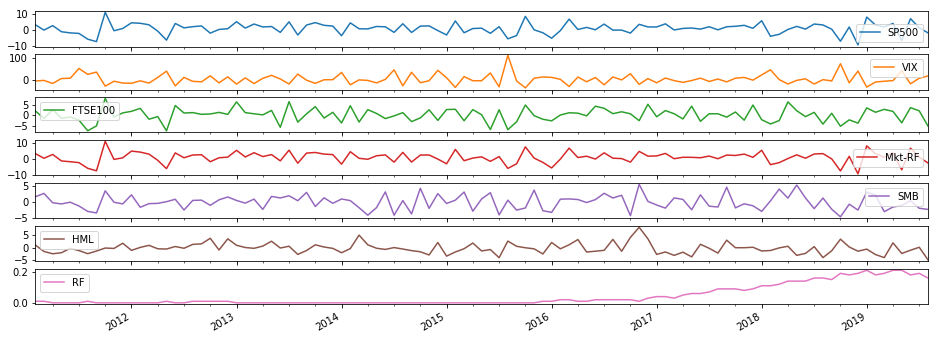

In [94]:
datamain.plot(figsize=(16,6), subplots=True)


**CAUTION** Different start points of data, if plotted separately

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc390eb74a8>,
      dtype=object)

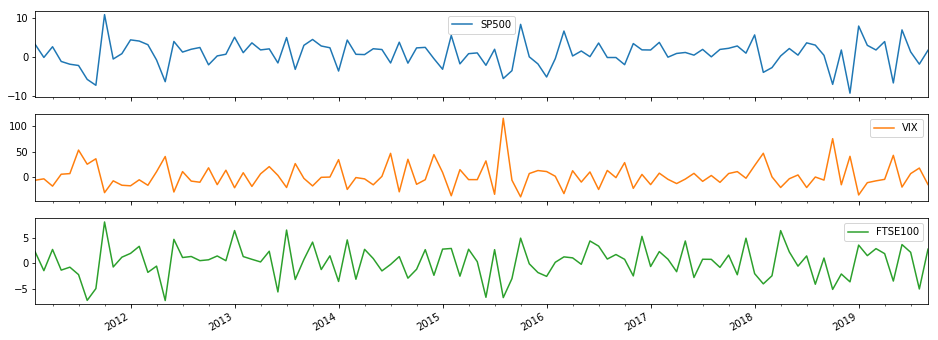

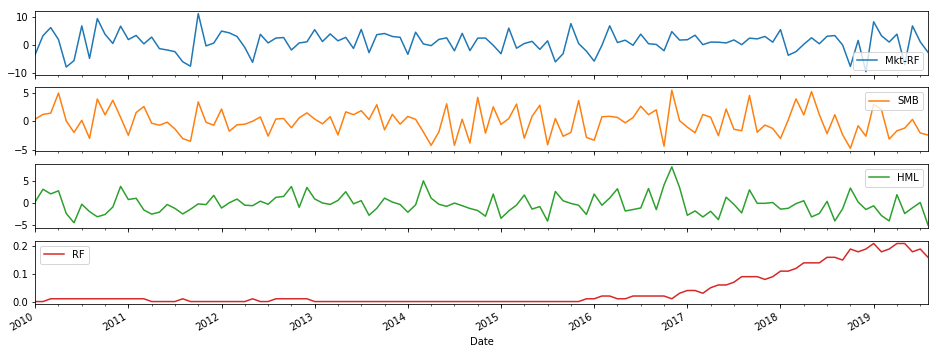

In [95]:
returns.plot(figsize=(16,6), subplots=True)  #'01-10-2011', '30-09-2019'
FFdata_Classic.plot(figsize=(16,6), subplots=True) # 01-01-2010

**EXERCISE:** Define position weights (allocations) -- this is your strategy. For trading the mean-reversion, strategy weights can be obtained by applying Cointegration Analysis (for two variables, this is known as ECM model and Engle-Granger procedure)

---------

### Quick Regression for Factor Backtesting

There are two choices of packages to run statistical routines in Python (on top of _numpy_ core package):

* _sklearn_ linear model will be useful for our Machine Learning endeavours, particularly running of the classifiers.

Its LinearRegression implementation though done as a classifier and beta coefficients are found by optimisation, not by exact OLS formulae that stem from analytical optimisation (eg, derivatives equated to zero) of the joint Normal pdf of regression residuals.


* _statsmodels_ is a routine choice for running statistics in Python, It is less friendly, and documentation is dry style. There are problems with its _ts.coint()_ routine.  _statsmodels_ have no features to facilitate **Rolling Estimation** of betas or do crossvalidation-type estimation with various sample selection from the dataset.
<br><br>

In [96]:
from sklearn import linear_model

In [97]:
Y_Strategy = datamain.loc[:,['SP500']]
X_Factors  = datamain.loc[:,['Mkt-RF', 'SMB', 'HML']] #df2.loc[startrow:endrow,startcolumn:endcolumn]

# Create linear regression object
OLS = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
OLS.fit(X_Factors, Y_Strategy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Below are our **Factor Betas** (theory explained in Project Workshop)

In [98]:
# Regression coefficients are our betas wrt factors
print('Coefficients: \n', OLS.coef_)

Coefficients: 
 [[ 0.97815059 -0.1304103  -0.01976672]]


In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [100]:
X_Factors = sm.add_constant(X_Factors)

backtest_OLS = sm.OLS(Y_Strategy, X_Factors).fit()
print(backtest_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6954.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          5.99e-115
Time:                        05:30:14   Log-Likelihood:                 4.1913
No. Observations:                 103   AIC:                           -0.3826
Df Residuals:                      99   BIC:                             10.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1230      0.025     -4.970      0.0

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


### EXERCISE: Rolling Parameter Estimation


1) The proper backtesting would require estimation of betas _wrt_ factors on the rolling basis, rather than producing one-off beta figures. 

2) Altegratively, one can utilise train_test_split functionality and crossvalidate the betas.

**REMINDER** The advantage of integrated Quantopian backtesting is that you would not need to reinvent computation of rolling beta, SR (and the factor data is held by Quantopian library for you). 

Limitations (1) you will be within Quantopian Risk Model as set in their whitepaper amd (2) the need to learn their package and `backtesting command language'.

Naturally, with the full-scale industry implementation you will have own data feeds and own systems. Quantopian library is a mid-way solution.

---

# Part 3. Pandas Plotting Capabilities

### 2D and 3D Scatterplots

Scatterplots between returns give idea of correlation. An attempt of 3D plot between factor time series gives spatial idea of the relationships between factors themselves. If only we could rotate!

**Explanation:** since our implied strategy was to invest 100% in S&P500 (from _Yahoo!Finance_) then its logical to observe neat correlation with the Market Factor which is S&P500 excess returns (from _Fama-French dataset_).

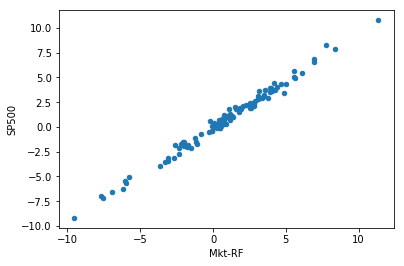

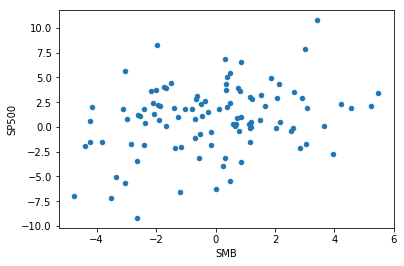

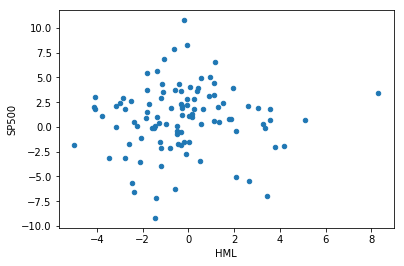

In [101]:
#Scatterplots directly from dataframe objects
#http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot 
datamain.plot(kind='scatter', x='Mkt-RF', y='SP500');

datamain.plot(kind='scatter', x='SMB', y='SP500');

datamain.plot(kind='scatter', x='HML', y='SP500');


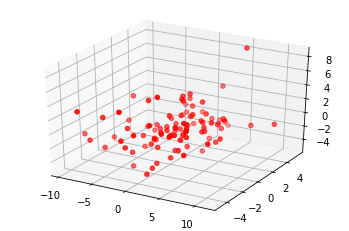

In [102]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

figure = plt.figure()
ax=figure.add_subplot(111, projection='3d')
ax.scatter(X_Factors['Mkt-RF'], X_Factors['SMB'], X_Factors['HML'], c='r', marker='o')
plt.show()


### Statistical Analysis via plots: Lag Plots, Autocorrelation, Bootstrap Plots

When plots are not simply plots but long-established tools of statical analysis. For instance, **lag plots** are simple idea of plotting return at time $t$ vs $t-1$, the more cirle-shaped the cloud is, the less autocorrelation and more 'Normality' there is to such data.

Pandas plotting offers interesting features that parallel Matlab,

* matrix of scatterplots (for correlation/copula exploration)
* Andrews curves
* lag plot to check for _iid_-ness
* autocorrelation plot
* bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean

All you need to know about plotting with pandas is available at

**MORE EXAMPLES:** http://pandas.pydata.org/pandas-docs/version/0.21.0/visualization.html and it appears Pandas implements [Graphical Techniques](http://www.itl.nist.gov/div898/handbook/eda/section3/eda34.htm) from _Engineering Statistics Textbook_ published by NIST.

**CODING IN R:** in R with similar functionality from _ggplot2_ library.
https://opendatascience.com/blog/data-visualization-part-2/



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3b12972e8>,
      dtype=object)

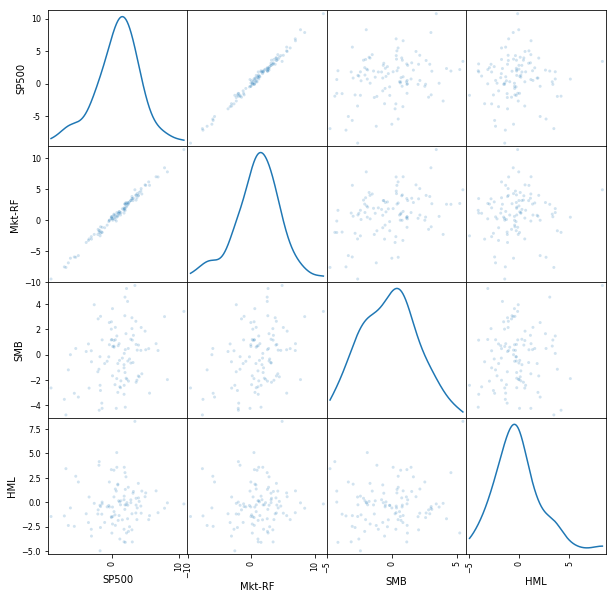

In [105]:
from pandas.plotting import scatter_matrix

scatter_matrix(datamain.loc[:,['SP500', 'Mkt-RF', 'SMB', 'HML']], alpha=0.2, figsize=(10, 10), diagonal='kde')


When interpreting autocorrelation, remember that we used MONTHLY returns to be compatible with Fama-French monthly frequency.

----

#### Lag Plot

/Users/diamond/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


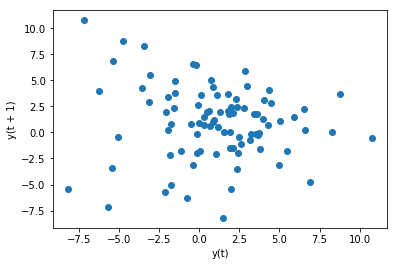

In [19]:
from pandas.tools.plotting import lag_plot

lag_plot(datamain.loc[:,['SP500']])

----

#### Autocorrelation Plot - ACF

/Users/diamond/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


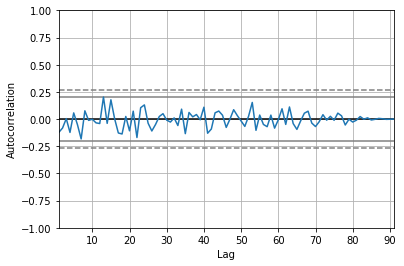

In [21]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(datamain.loc[:,['SP500']])
autocorrelation_plot(datamain.loc[:,['HML']])
autocorrelation_plot(datamain.loc[:,['SMB']])

In [37]:
# Time series datasets -- indexed by dates, there are no name labels for observations, otherwise we can run radviz plot.
# One can group monthly returns, or returns clusters for increased vol periods.

#import matplotlib.pyplot as plt

#from pandas.tools.plotting import radviz

#plt.figure()

#radviz(datamain, 'Date')

/Users/diamond/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.bootstrap_plot' is deprecated, import 'pandas.plotting.bootstrap_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


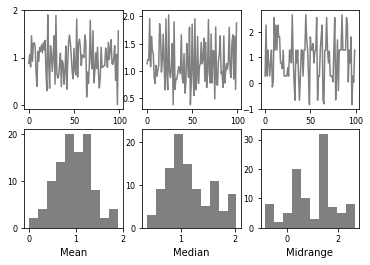

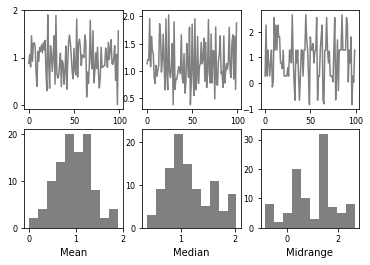

In [35]:
from pandas.tools.plotting import bootstrap_plot

bootstrap_plot(datamain['SP500'], size=50, samples=100, color='grey')


Visually assess the uncertainty of a statistic, such as mean, median, midrange. A random subset of a specified size is selected, the statistic in question is computed -- the process is repeated a specified number of times _samples=100_. Resulting plots and histograms are what constitutes the bootstrap plot.

**END OF DEMONSTRATION**